In [4]:
!pip install sorted-months-weekdays --quiet
!pip install sort-dataframeby-monthorweek --quiet

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *


In [6]:
data = pd.read_csv("/content/covid_impact_on_airport_traffic.csv")
data.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [7]:
data.shape

(7247, 11)

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum()

AggregationMethod    0
Date                 0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

In [10]:
data['long'] = data['Centroid'].apply(lambda x: x[6:-1].split(' ')[0])
data['lat'] = data['Centroid'].apply(lambda x: x[6:-1].split(' ')[1])

In [11]:
data.head(2)

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,long,lat
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",151.180087713813,-33.9459774986125
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1...",151.180087713813,-33.9459774986125


## **Exploratory Data Analysis**



In [12]:
data[['Country']].value_counts().sort_values()

Country                       
Chile                              238
Australia                          257
Canada                            2311
United States of America (the)    4441
dtype: int64

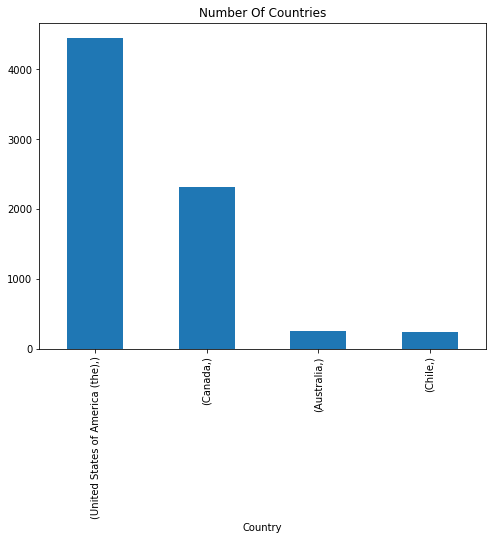

In [13]:
data[['Country']].value_counts().plot(kind='bar', figsize=(8,6), title="Number Of Countries")

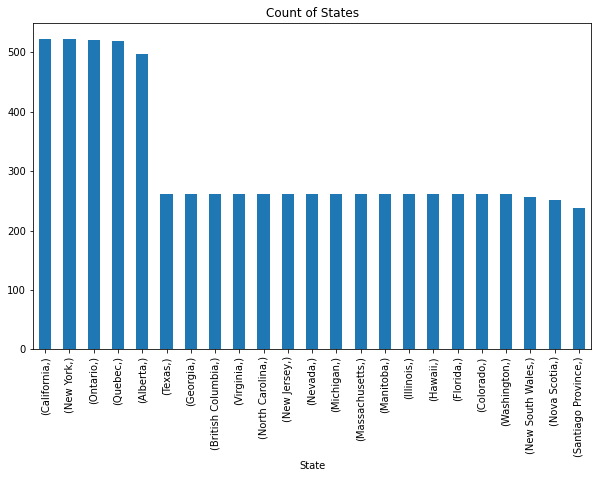

In [14]:
data[['State']].value_counts().plot(kind='bar', figsize=(10,6), title='Count of States')

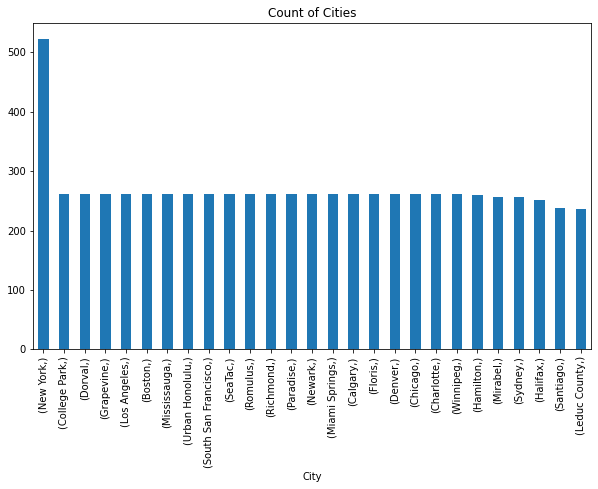

In [15]:
data[['City']].value_counts().plot(kind='bar', figsize=(10,6), title='Count of Cities')

In [16]:
data[['AirportName']].value_counts()

AirportName                              
Los Angeles International                    262
Dallas/Fort Worth International              262
Montreal Trudeau                             262
Hartsfield-Jackson Atlanta International     262
John F. Kennedy International                262
Boston Logan International                   261
Washington Dulles International              261
Vancouver International                      261
Toronto Pearson                              261
Seattle-Tacoma International                 261
San Francisco International                  261
Newark Liberty International                 261
Miami International                          261
McCarran International                       261
LaGuardia                                    261
Calgary International                        261
Detroit Metropolitan Wayne County            261
Denver International                         261
Daniel K. Inouye International               261
Chicago OHare International

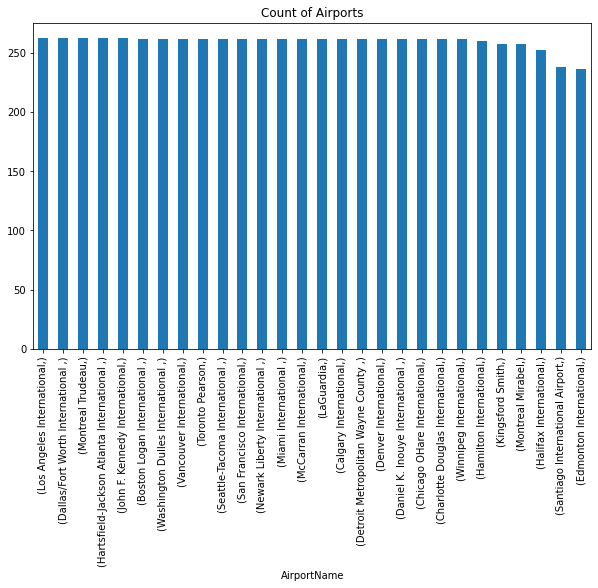

In [17]:
data[['AirportName']].value_counts().plot(kind='bar', figsize=(10,6), title='Count of Airports')

In [18]:
data = data.sort_values('Date')
data['New_Date'] = pd.to_datetime(data['Date']).dt.strftime('%d-%m-%Y')
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.to_datetime(data['Date']).dt.month_name()
data['Day'] = pd.to_datetime(data['Date']).dt.day_name()

In [19]:
data.head(2)

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,long,lat,New_Date,Year,Month,Day
302,Daily,2020-03-16,1.0,Santiago International Airport,96,POINT(-70.7942372739446 -33.3907265266744),Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ...",-70.7942372739446,-33.3907265266744,16-03-2020,2020,March,Monday
1713,Daily,2020-03-16,1.0,Halifax International,72,POINT(-63.5116720134583 44.8830168353507),Halifax,Nova Scotia,CA-NS,Canada,"POLYGON((-63.5266613960266 44.8984438169036, -...",-63.5116720134583,44.8830168353507,16-03-2020,2020,March,Monday


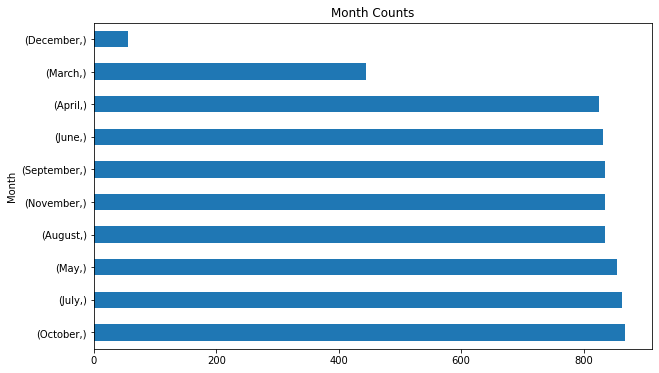

In [20]:
data[['Month']].value_counts().plot(kind='barh', figsize=(10,6), title='Month Counts')

Text(0.5, 1.0, 'Day of The Week Records')

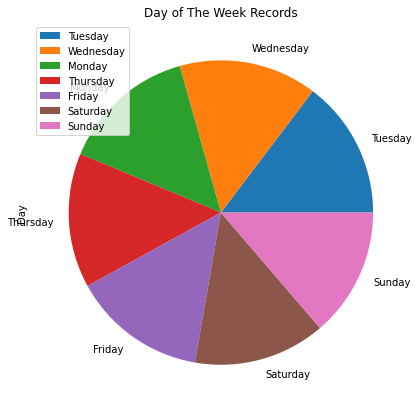

In [21]:
df_weekday = pd.DataFrame(data["Day"].value_counts())
p = df_weekday.plot.pie(y='Day', figsize=(7, 7))
p.set_title("Day of The Week Records")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


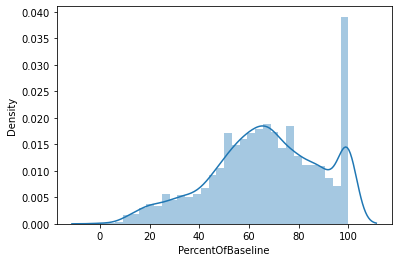

In [22]:
sns.distplot(data['PercentOfBaseline'])

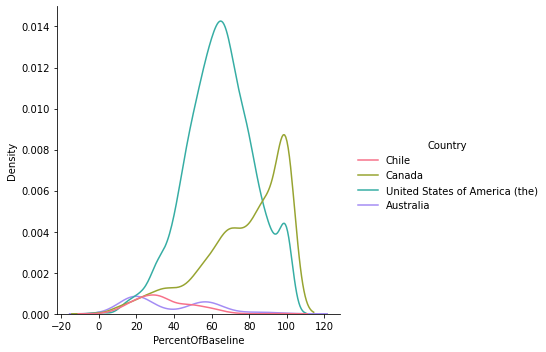

In [23]:
sns.displot(data, x="PercentOfBaseline", hue='Country', palette='husl', kind="kde")

### Average Percent of Baseline for Each Country (Month & Weekdays)

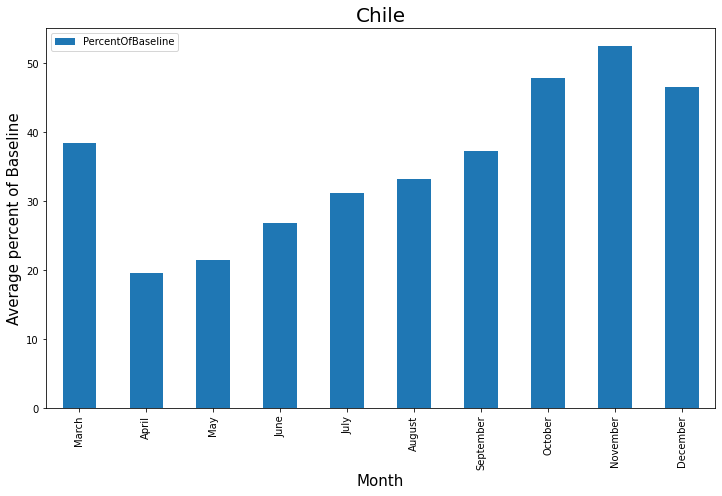

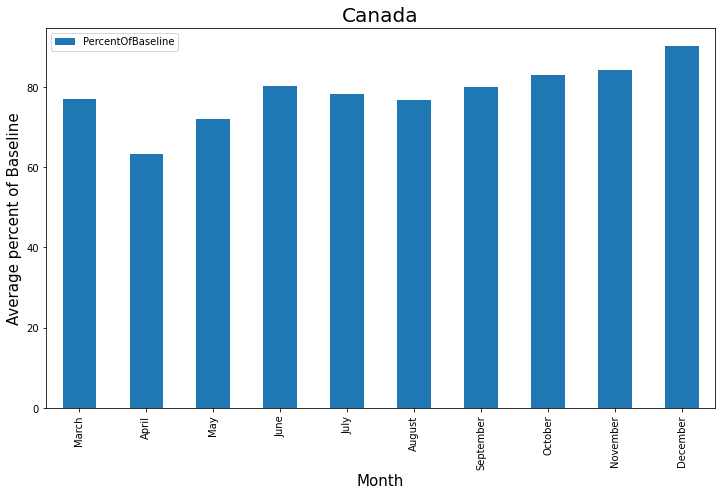

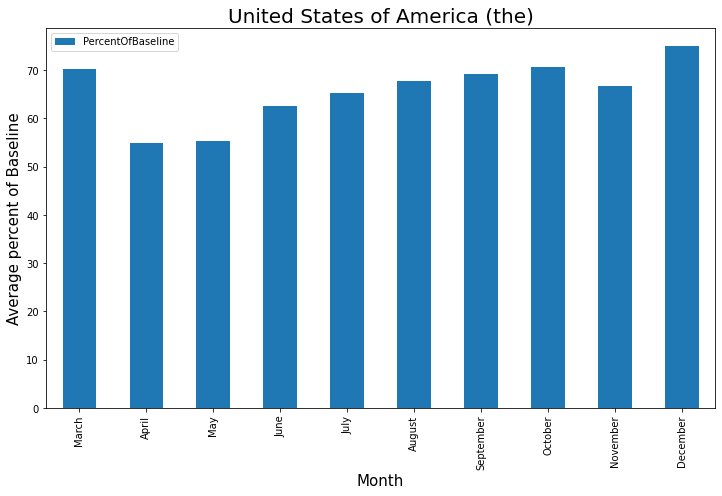

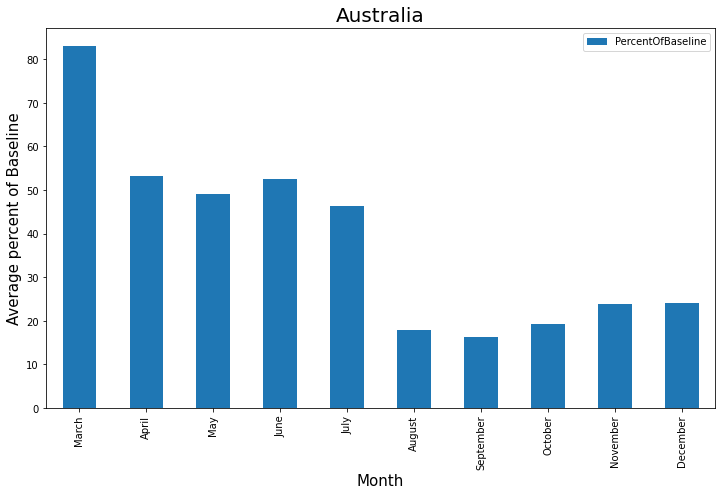

In [24]:
for i in data['Country'].unique():
  df_mnth = data[['PercentOfBaseline', 'Month']][data['Country']==i].sort_values('Month')
  df_mnth_avg = df_mnth.groupby('Month', as_index=False)['PercentOfBaseline'].mean()
  df_sort_month = Sort_Dataframeby_Month(df=df_mnth_avg,monthcolumnname='Month')
  df_sort_month.plot.bar(x='Month', y='PercentOfBaseline',figsize=(12,7))
  plt.ylabel("Average percent of Baseline",size=15)
  plt.xlabel("Month",size=15)
  plt.title(i, size=20)
  plt.show()

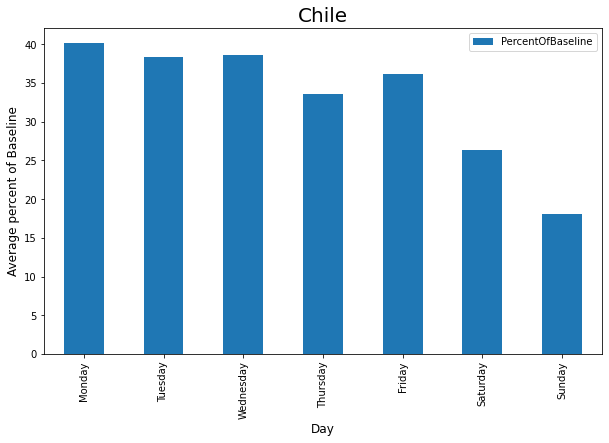

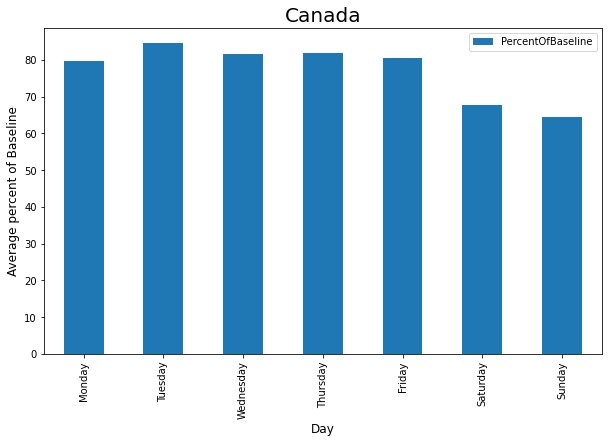

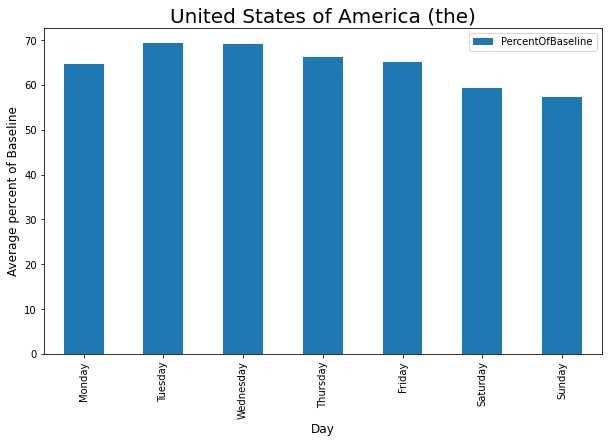

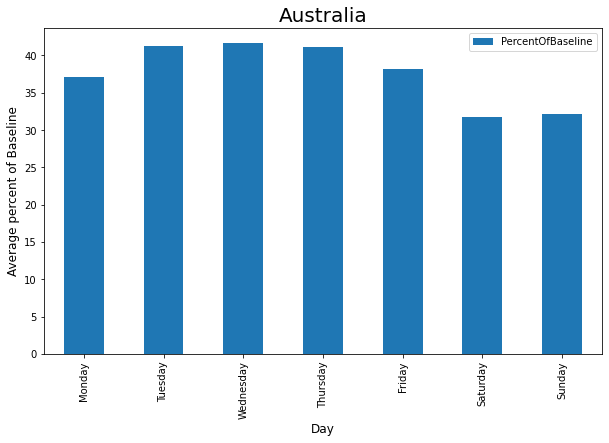

In [25]:
for i in data['Country'].unique():
  df = data[['PercentOfBaseline', 'Day']][data['Country']==i]
  df_day = df.groupby('Day', as_index=False)['PercentOfBaseline'].mean()
  sort_days = Sort_Dataframeby_Weekday(df=df_day,Weekdaycolumnname='Day')
  sort_days.plot.bar(x='Day', y='PercentOfBaseline',figsize=(10,6))
  plt.ylabel("Average percent of Baseline",size=12)
  plt.xlabel("Day",size=12)
  plt.title(i, size=20)
  plt.show()


### Analysis For Chile 

In [26]:
chile = data[data['Country']== 'Chile']

In [27]:
chile = chile.set_index('New_Date')
chile.head(1)

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography,long,lat,Year,Month,Day
New_Date,,,,,,,,,,,,,,,,
16-03-2020,Daily,2020-03-16,1.0,Santiago International Airport,96,POINT(-70.7942372739446 -33.3907265266744),Santiago,Santiago Province,CL,Chile,"POLYGON((-70.8043956756592 -33.3719683869737, ...",-70.7942372739446,-33.3907265266744,2020,March,Monday


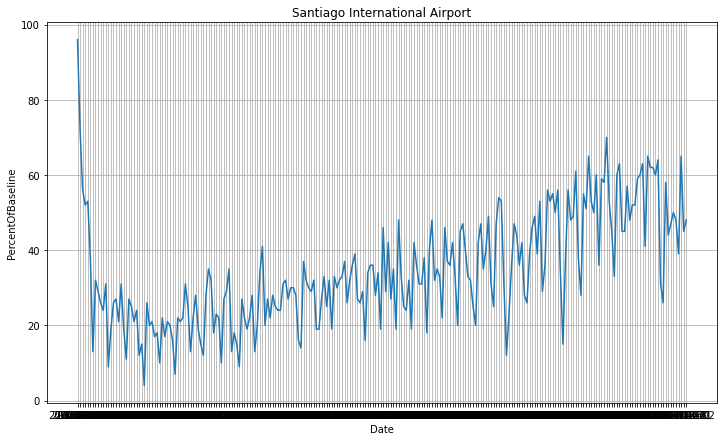

In [28]:
for i in chile['AirportName'].unique():
  df = chile[chile['AirportName']== i]

  fig = plt.figure(figsize=(12,7))
  sns.lineplot(data=df, x ="Date", y="PercentOfBaseline")
  plt.ylabel("PercentOfBaseline")
  plt.xlabel("Date")

  plt.title(i)
  plt.grid()
plt.show()

Stay tuned for more analysis and notes on this..